In [92]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import time

In [93]:
mnist= keras.datasets.mnist

In [94]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [95]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [96]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

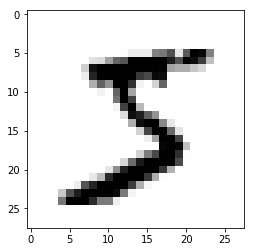

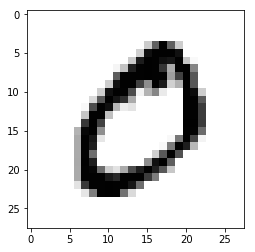

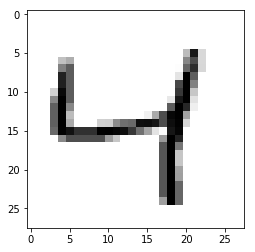

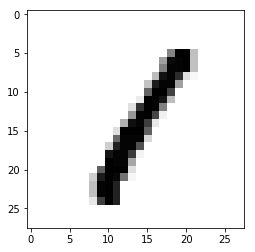

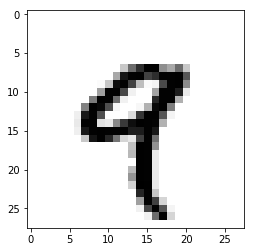

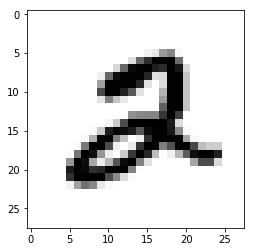

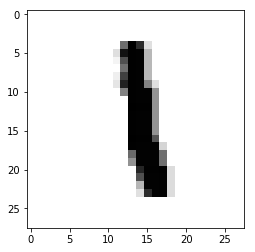

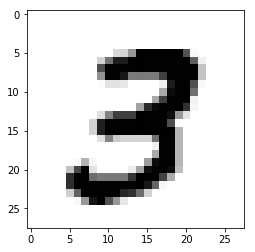

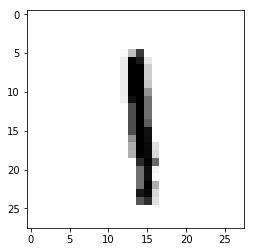

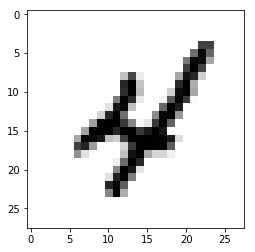

In [97]:
for i in range(10):
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.show()

In [98]:
x_train=x_train/255
x_test= x_test/255

In [99]:
print(x_train[0])
print(x_train[0].shape)
#x_train=keras.utils.normalize(x_train, axis=1)
#x_test=keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [100]:
#x_train= x_train.reshape(x_train.shape[0], -1)

In [101]:
print(x_train.shape)

(60000, 28, 28)


In [102]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import TensorBoard

In [103]:
model= keras.Sequential()

name='recog-{}'.format(int(time.time()))

model.add(Flatten())

model.add(Dense(128, activation='relu', input_shape= x_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

tensorboard=TensorBoard(log_dir='logs/{}'.format(name))

model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=32, callbacks=[tensorboard])

model.summary()

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.2545 - acc: 0.9243 - val_loss: 0.1327 - val_acc: 0.9600
Epoch 2/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.1047 - acc: 0.9676 - val_loss: 0.0925 - val_acc: 0.9728
Epoch 3/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.0721 - acc: 0.9774 - val_loss: 0.0787 - val_acc: 0.9758
Epoch 4/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.0554 - acc: 0.9825 - val_loss: 0.0817 - val_acc: 0.9763
Epoch 5/5
54000/54000 [==============================] - 7s 126us/step - loss: 0.0445 - acc: 0.9852 - val_loss: 0.0818 - val_acc: 0.9785
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
de

In [104]:
val_loss,val_acc= model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 34us/step


In [105]:
print(val_loss)
print(val_acc)

0.08175107248487185
0.9762


In [106]:
model.save('recogniser.model')

In [107]:
hand= keras.models.load_model('recogniser.model')

In [108]:
predictions= hand.predict(x_test)

In [109]:
print(predictions)

[[1.3488663e-10 1.2176078e-07 2.0552199e-07 ... 9.9998748e-01
  1.9504766e-07 1.2333001e-06]
 [1.4524074e-12 5.1545971e-08 9.9999857e-01 ... 3.7653883e-13
  9.3771977e-09 3.7966109e-15]
 [1.9135404e-08 9.9740845e-01 3.1303402e-06 ... 1.5748583e-04
  2.3521639e-03 1.5800921e-06]
 ...
 [1.2211039e-14 1.3695619e-12 6.7715901e-13 ... 5.8293830e-07
  3.1625655e-09 5.8561625e-05]
 [1.0828177e-11 5.3951770e-13 3.9785693e-14 ... 2.1470392e-10
  4.5201952e-07 1.1762311e-14]
 [1.4371734e-08 9.6983437e-12 5.0391130e-10 ... 3.7272474e-15
  2.8591023e-09 3.6387334e-11]]


In [110]:
predictions.shape

(10000, 10)

In [111]:
result=[]
for i in range(predictions.shape[0]):
    result.append(np.argmax(predictions[i]))

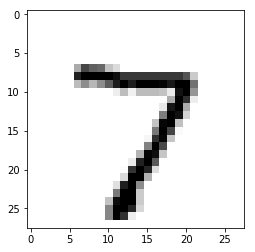

In [112]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [113]:
print(result)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
print(accuracy_score(result, y_test))

0.9762
